**Proyecto: Predicción de Incumplimiento de Crédito**



*   Instalar e importar librerías


In [75]:
!pip install pandas scikit-learn
!pip install tensorflow

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_auc_score, mean_squared_error, r2_score
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout


import warnings
warnings.filterwarnings('ignore')  # Eliminar advertencias


# Tabla de Contenido

1.   **Proyecto:** Predicción de Incumplimiento de Crédito
2.   Objetivo
3.   Cargar Dataset y Análisis Exploratorio de Datos (EDA)
4.   Definir Datos de Entrenamiento y Prueba
5.   Entrenamiento de Datos
6.   Evaluación de Modelos

7.   Reporte de Modelos
8.   Red Neuronal

9.   Construcción de Modelo con Keras
10.   Implementación con MLPClassifier
11.   Guardar Modelos Entrenados
12.   Conclusiones
13.   Fuentes y Bibliografías

# **1. Titulo**

*   **Predicción de Incumplimiento de Crédito**


# **2. Objetivo**

*   Predecir si un cliente incumplirá el pago de su tarjeta de crédito en el próximo mes.



# **3. Cargar Dataset y Análisis Exploratorio de Datos (EDA)**

In [38]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [39]:
# Cargar el dataset
df = pd.read_csv('/content/Credit Card Defaulter Prediction.csv')

# Exploración de los datos
df.head()
df

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,1,20000,F,University,Married,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,Y
1,2,120000,F,University,Single,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,Y
2,3,90000,F,University,Single,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,N
3,4,50000,F,University,Married,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,N
4,5,50000,M,University,Married,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,M,High School,Married,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,N
29996,29997,150000,M,High School,Single,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,N
29997,29998,30000,M,University,Single,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,Y
29998,29999,80000,M,High School,Married,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,Y


In [40]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         30000 non-null  int64 
 1   LIMIT_BAL  30000 non-null  int64 
 2   SEX        30000 non-null  object
 3   EDUCATION  30000 non-null  object
 4   MARRIAGE   30000 non-null  object
 5   AGE        30000 non-null  int64 
 6   PAY_0      30000 non-null  int64 
 7   PAY_2      30000 non-null  int64 
 8   PAY_3      30000 non-null  int64 
 9   PAY_4      30000 non-null  int64 
 10  PAY_5      30000 non-null  int64 
 11  PAY_6      30000 non-null  int64 
 12  BILL_AMT1  30000 non-null  int64 
 13  BILL_AMT2  30000 non-null  int64 
 14  BILL_AMT3  30000 non-null  int64 
 15  BILL_AMT4  30000 non-null  int64 
 16  BILL_AMT5  30000 non-null  int64 
 17  BILL_AMT6  30000 non-null  int64 
 18  PAY_AMT1   30000 non-null  int64 
 19  PAY_AMT2   30000 non-null  int64 
 20  PAY_AMT3   30000 non-null  i

In [41]:
print(df.describe())

                 ID       LIMIT_BAL           AGE         PAY_0         PAY_2  \
count  30000.000000    30000.000000  30000.000000  30000.000000  30000.000000   
mean   15000.500000   167484.322667     35.485500     -0.016700     -0.133767   
std     8660.398374   129747.661567      9.217904      1.123802      1.197186   
min        1.000000    10000.000000     21.000000     -2.000000     -2.000000   
25%     7500.750000    50000.000000     28.000000     -1.000000     -1.000000   
50%    15000.500000   140000.000000     34.000000      0.000000      0.000000   
75%    22500.250000   240000.000000     41.000000      0.000000      0.000000   
max    30000.000000  1000000.000000     79.000000      8.000000      8.000000   

              PAY_3         PAY_4         PAY_5         PAY_6      BILL_AMT1  \
count  30000.000000  30000.000000  30000.000000  30000.000000   30000.000000   
mean      -0.166200     -0.220667     -0.266200     -0.291100   51223.330900   
std        1.196868      1.169

In [42]:
print(df.isnull().sum())

ID           0
LIMIT_BAL    0
SEX          0
EDUCATION    0
MARRIAGE     0
AGE          0
PAY_0        0
PAY_2        0
PAY_3        0
PAY_4        0
PAY_5        0
PAY_6        0
BILL_AMT1    0
BILL_AMT2    0
BILL_AMT3    0
BILL_AMT4    0
BILL_AMT5    0
BILL_AMT6    0
PAY_AMT1     0
PAY_AMT2     0
PAY_AMT3     0
PAY_AMT4     0
PAY_AMT5     0
PAY_AMT6     0
default      0
dtype: int64



*   **Histograma de Variables Numéricas**



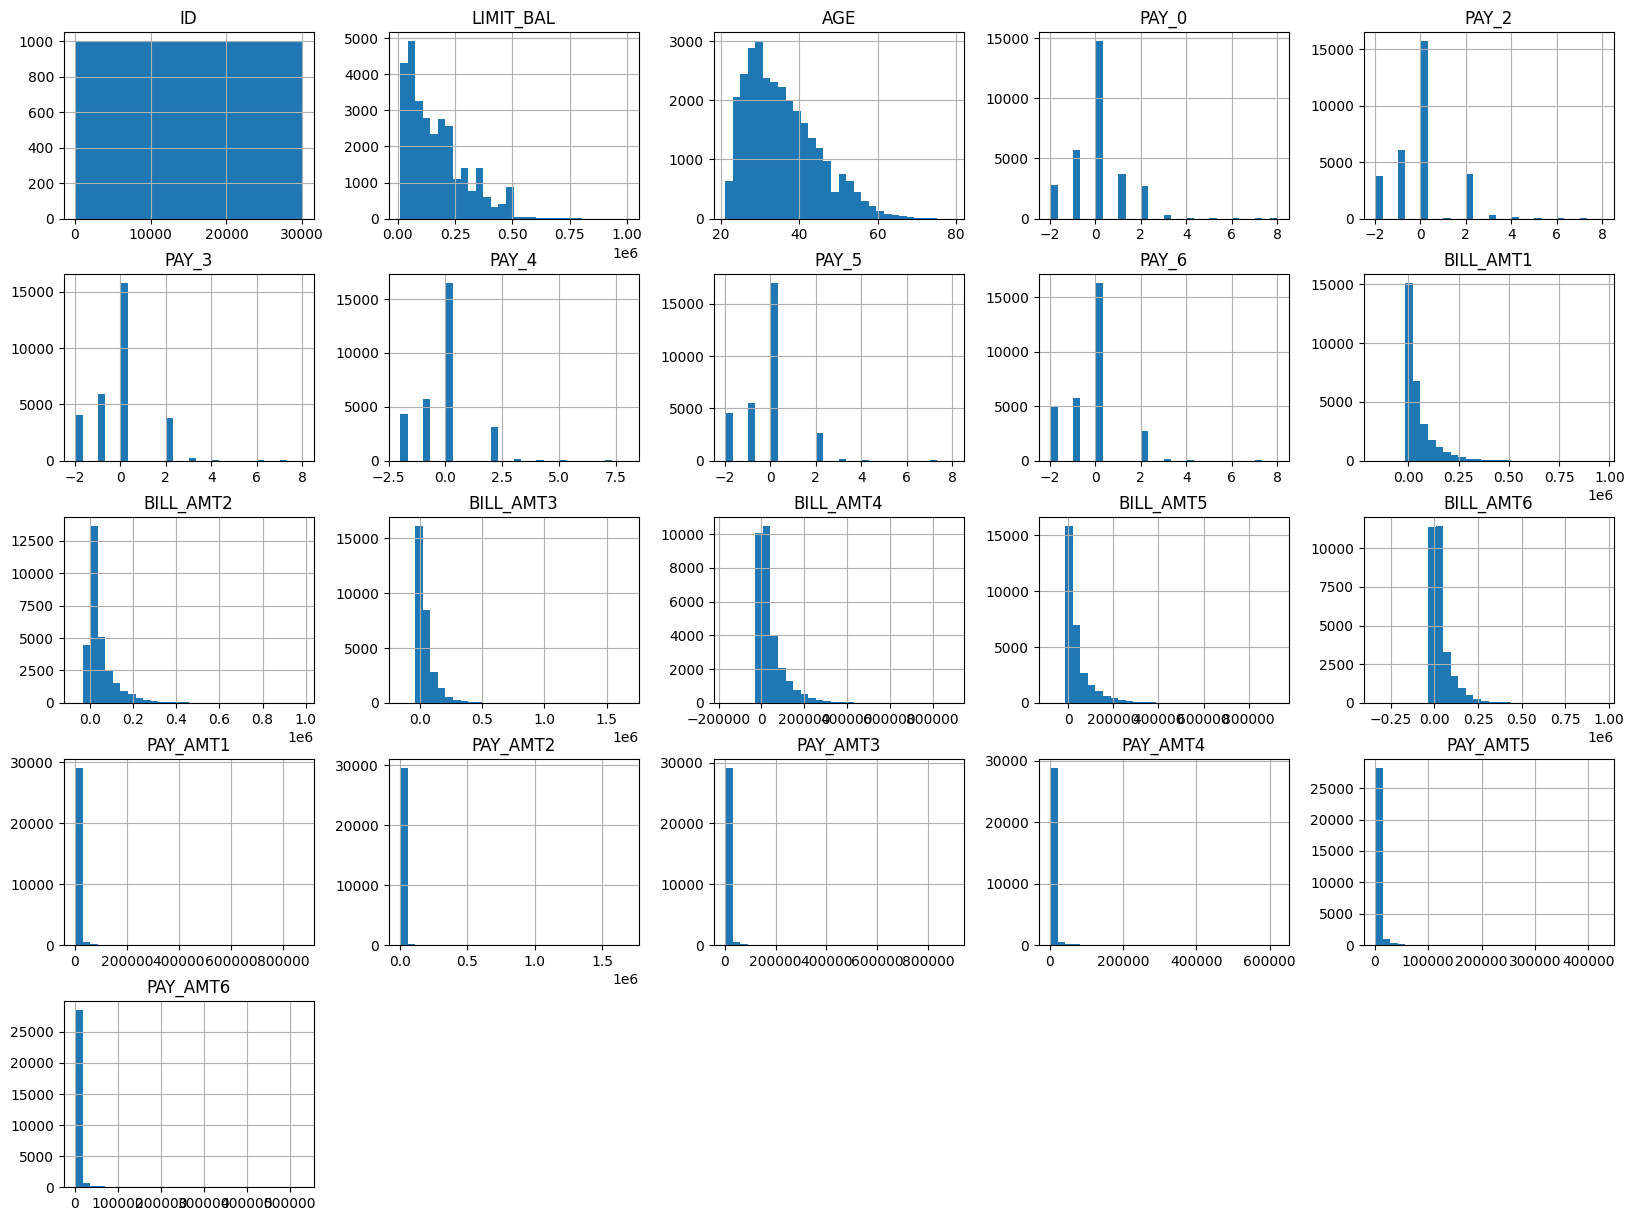

In [43]:
df.hist(bins=30, figsize=(20,15))
plt.show()

*   **Matriz de Correlación**



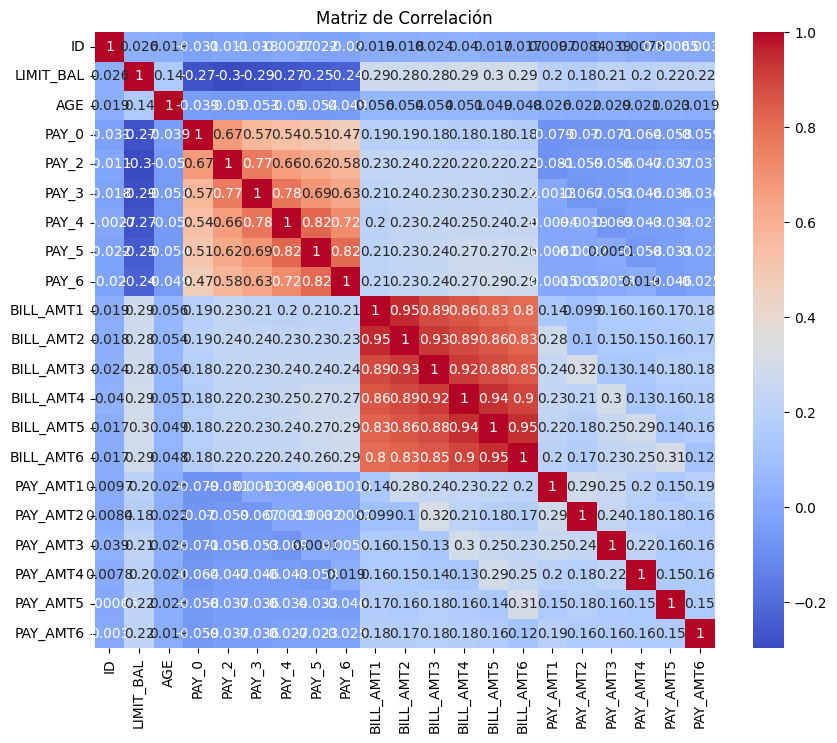

In [44]:
# Seleccione solo características numéricas para el cálculo de correlación
numeric_df = df.select_dtypes(include=['number'])

plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title("Matriz de Correlación")
plt.show()

*  **Limpieza de Datos**

Eliminar columnas innecesarias



In [45]:
# Eliminar columnas que no aportan al modelo
# Verificar si las columnas existen antes de eliminarlas
columns_to_drop = ['ID', 'Name']
existing_columns = df.columns

for column in columns_to_drop:
    if column in existing_columns:
        df.drop([column], axis=1, inplace=True)
    else:
        print(f"La columna '{column}' no se encuentra en el DataFrame.")

La columna 'Name' no se encuentra en el DataFrame.


*   **Manejo de Valores Nulos**


In [46]:
# Rellenar valores nulos con la media solo en columnas numéricas
for column in df.select_dtypes(include=['number']):
    df[column].fillna(df[column].mean(), inplace=True)

# **4. Definir Datos de Entrenamiento y Prueba**

Definimos las columnas que tiene nuestro dataset y tomamos train y test

In [47]:
print(df.columns)

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'default '],
      dtype='object')


In [48]:
# Reemplace 'target_variable_name' con el nombre real de su columna de destino
X = df.drop('default ', axis=1)
y = df['default ']

# Identificar todas las columnas de objetos (categóricas)
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()

# Codificación one-hot de todas las columnas categóricas usando pd.get_dummies
X = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

# Ahora puedes escalar los datos ya que todas las columnas son numéricas
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# División de datos
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
print(X_train)

[[-0.67427636 -1.24601985  0.01486052 ... -0.91426088 -0.10432569
   0.93767172]
 [-1.05964618 -0.81207449  0.01486052 ... -0.91426088 -0.10432569
   0.93767172]
 [ 0.09646329  0.92370693  0.01486052 ...  1.09377971 -0.10432569
  -1.06647132]
 ...
 [-0.90549825 -1.02904717 -1.76484282 ... -0.91426088 -0.10432569
   0.93767172]
 [-0.75135032 -1.13753351  0.01486052 ... -0.91426088 -0.10432569
   0.93767172]
 [-0.05768464  0.05581622 -1.76484282 ...  1.09377971 -0.10432569
  -1.06647132]]


In [65]:
y_train.shape

(24000,)

In [66]:
X_test.shape

(6000, 29)

In [67]:
y_test.shape

(6000,)

# **5. Entrenamiento de Modelos**

*   **Regresión Logística**



In [103]:
#Modelo de Regresión Logística
model_lr = LogisticRegression()
model_lr.fit(X_train, y_train)
y_pred_lr = model_lr.predict(X_test)

*   **Random Forest**



In [85]:
#Modelos Random Forest
model_rf = RandomForestClassifier()
model_rf.fit(X_train, y_train)
y_pred_rf = model_rf.predict(X_test)

*   **MLP Classifier (Red Neuronal)**



In [86]:
#MLP Classifier
model_mlp = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=300)
model_mlp.fit(X_train, y_train)
y_pred_mlp = model_mlp.predict(X_test)


# **6. Evaluación de Modelos**

*   **Matriz de Confusión**



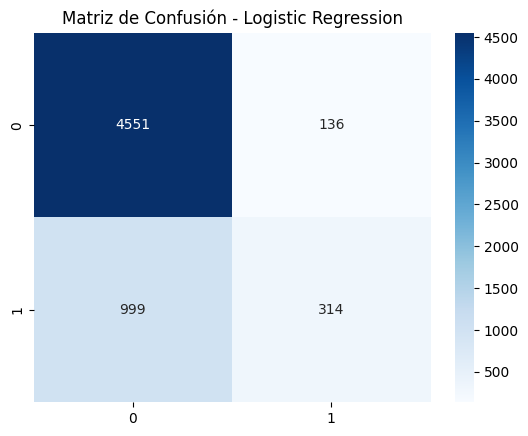

Reporte de Clasificación - Logistic Regression
              precision    recall  f1-score   support

           N       0.82      0.97      0.89      4687
           Y       0.70      0.24      0.36      1313

    accuracy                           0.81      6000
   macro avg       0.76      0.61      0.62      6000
weighted avg       0.79      0.81      0.77      6000



In [52]:
models = [("Logistic Regression", y_pred_lr)]

for name, y_pred in models:
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"Matriz de Confusión - {name}")
    plt.show()
    print(f"Reporte de Clasificación - {name}")
    print(classification_report(y_test, y_pred))


# **7. Reporte de Modelos**

Reporte accuracy de los 3 modelos

In [53]:
models = [("Logistic Regression", y_pred_lr), ("Random Forest", y_pred_rf), ("MLP Classifier", y_pred_mlp)]

for name, y_pred in models:
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Precisión para {name}: {accuracy}")

Precisión para Logistic Regression: 0.8108333333333333
Precisión para Random Forest: 0.8153333333333334
Precisión para MLP Classifier: 0.7681666666666667




*   **Graficas de los 3 Modelos aplicados**



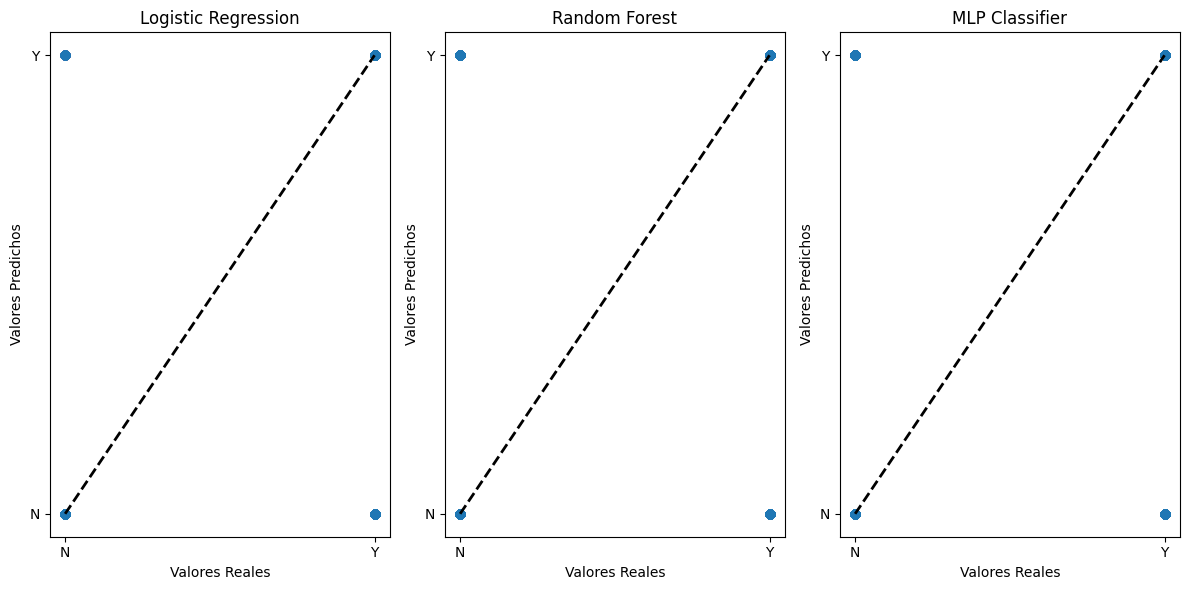

In [54]:
# Graficar Logistic Regression, Randon Forest, MLP Classifier
models = [("Logistic Regression", y_pred_lr), ("Random Forest", y_pred_rf), ("MLP Classifier", y_pred_mlp)]

plt.figure(figsize=(12, 6))
for i, (name, y_pred) in enumerate(models, 1):
    plt.subplot(1, 3, i)
    plt.scatter(y_test, y_pred, alpha=0.5)
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--', lw=2)
    plt.xlabel('Valores Reales')
    plt.ylabel('Valores Predichos')
    plt.title(f'{name}')

plt.tight_layout()
plt.show()

*   **Validación cruzada**



In [87]:
# Validación cruzada
models = [("Logistic Regression", model_lr), ("Random Forest", model_rf), ("MLP Classifier", model_mlp)]

for name, model in models:
    cv_scores = cross_val_score(model, X_train, y_train, cv=5) # Llamar a cross_val_score con los argumentos adecuados
    print(f"Precisión de validación cruzada para {name}: {cv_scores.mean()}")
    print(f"Desviación estándar de la precisión de validación cruzada para {name}: {cv_scores.std()}")
    print()

Precisión de validación cruzada para Logistic Regression: 0.8102916666666665
Desviación estándar de la precisión de validación cruzada para Logistic Regression: 0.002861380785564917

Precisión de validación cruzada para Random Forest: 0.8150833333333333
Desviación estándar de la precisión de validación cruzada para Random Forest: 0.0046707571358637545

Precisión de validación cruzada para MLP Classifier: 0.7726666666666666
Desviación estándar de la precisión de validación cruzada para MLP Classifier: 0.006198958245813046



*   **Cálculo del R2**

In [ ]:
# Calcular el R2
r2_lr = model_lr.score(X_test, y_test)
r2_rf = model_rf.score(X_test, y_test)
# Ajustar el modelo antes de calcular la puntuación.
model_mlp.fit(X_scaled, y)  # Ajustar el modelo a todo el conjunto de datos.

r2_mlp = model_mlp.score(X_test, y_test)

print(f"R2 para Logistic Regression: {r2_lr}")
print(f"R2 para Random Forest: {r2_rf}")
print(f"R2 para MLP Classifier: {r2_mlp}")

# **8. Red Neuronal**

*   Con los mismos datos vamos a trabajar una red neuronal, vamos recapitular los datos y verificar que sean datos numericos



In [79]:
# Verificar valores nulos
print(df.isnull().sum())

LIMIT_BAL    0
SEX          0
EDUCATION    0
MARRIAGE     0
AGE          0
PAY_0        0
PAY_2        0
PAY_3        0
PAY_4        0
PAY_5        0
PAY_6        0
BILL_AMT1    0
BILL_AMT2    0
BILL_AMT3    0
BILL_AMT4    0
BILL_AMT5    0
BILL_AMT6    0
PAY_AMT1     0
PAY_AMT2     0
PAY_AMT3     0
PAY_AMT4     0
PAY_AMT5     0
PAY_AMT6     0
default      0
dtype: int64


In [80]:
# Estadísticas descriptivas
print(df.describe())

            LIMIT_BAL           AGE         PAY_0         PAY_2         PAY_3  \
count    30000.000000  30000.000000  30000.000000  30000.000000  30000.000000   
mean    167484.322667     35.485500     -0.016700     -0.133767     -0.166200   
std     129747.661567      9.217904      1.123802      1.197186      1.196868   
min      10000.000000     21.000000     -2.000000     -2.000000     -2.000000   
25%      50000.000000     28.000000     -1.000000     -1.000000     -1.000000   
50%     140000.000000     34.000000      0.000000      0.000000      0.000000   
75%     240000.000000     41.000000      0.000000      0.000000      0.000000   
max    1000000.000000     79.000000      8.000000      8.000000      8.000000   

              PAY_4         PAY_5         PAY_6      BILL_AMT1      BILL_AMT2  \
count  30000.000000  30000.000000  30000.000000   30000.000000   30000.000000   
mean      -0.220667     -0.266200     -0.291100   51223.330900   49179.075167   
std        1.169139      1.

In [81]:
# Revisar columnas
print(df.columns)

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'default '],
      dtype='object')


*   **Distribución de la variable objetivo**



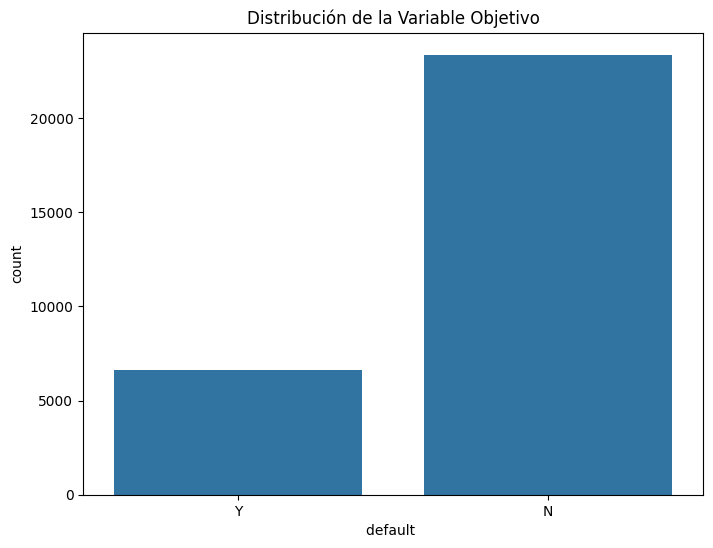

In [83]:
# Distribución de la variable objetivo
plt.figure(figsize=(8, 6))
sns.countplot(x='default ', data=df)  # Replace 'default.payment.next.month' if needed
plt.title('Distribución de la Variable Objetivo')
plt.show()



*   Cambiar dato de texto Y y N a numerico 1 y 2



In [89]:
# Convierta la variable de destino a numérica usando la codificación de etiquetas DESPUÉS de dividirla en tren y prueba

label_encoder = LabelEncoder()
# Coloque el codificador en los datos de entrenamiento y transforme tanto los datos de entrenamiento como los de prueba.
y_train = label_encoder.fit_transform(y_train.astype(str))
y_test = label_encoder.transform(y_test.astype(str))

# **9. Construcción de Modelo con Keras**

Configuramos una red neuronal con Keras para la clasificación

*   **Definación del modelo**


In [95]:
# Definir el modelo
model = Sequential()
model.add(Dense(32, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # Salida binaria

# Compilar el modelo
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                     │ (None, 32)                  │             960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 8)                   │             136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,633 (6.38 KB)

 Trainable params: 1,633 (6.38 KB)

 Non-trainable params: 0 (0.00 B)



*   **Entrenamiento del modelo**


In [61]:
# Entrenamiento del modelo con early stoping
early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, callbacks=[early_stopping])

Epoch 1/50
600/600 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.7071 - loss: 0.5715 - val_accuracy: 0.8156 - val_loss: 0.4607
Epoch 2/50
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8241 - loss: 0.4327 - val_accuracy: 0.8165 - val_loss: 0.4514
Epoch 3/50
600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8216 - loss: 0.4320 - val_accuracy: 0.8171 - val_loss: 0.4466
Epoch 4/50
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8199 - loss: 0.4391 - val_accuracy: 0.8154 - val_loss: 0.4479
Epoch 5/50
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8187 - loss: 0.4330 - val_accuracy: 0.8152 - val_loss: 0.4421
Epoch 6/50
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8184 - loss: 0.4329 - val_accuracy: 0.8165 - val_loss: 0.4425
Epoch 7/50
600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8201 - loss: 0.4297 - val_accuracy: 0.8142 - val_loss: 0.4420
Epoch 8/50
600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8208 - loss: 0.4227 - val_accuracy: 0.

*   **Evaluación del Modelo**

*   Generaremos gráficos de precisión y pérdida.



188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8106 - loss: 0.4377
Pérdida: 0.43602633476257324, Precisión: 0.8166666626930237


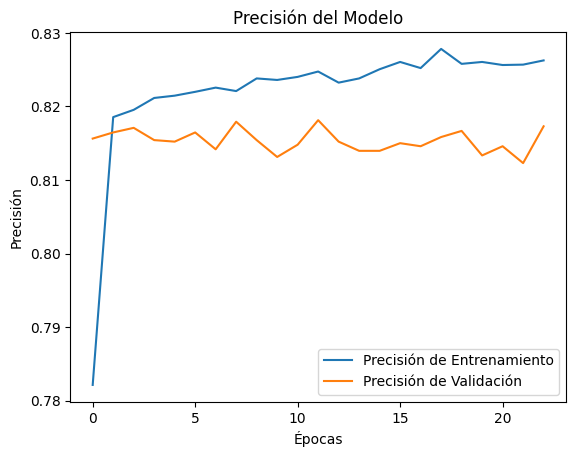

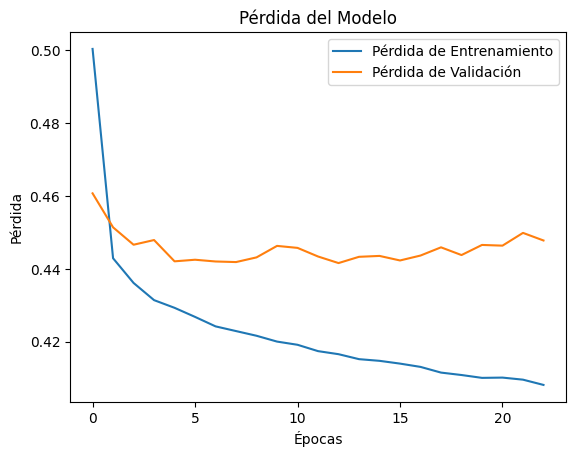

In [62]:
# Evaluación del modelo
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Pérdida: {loss}, Precisión: {accuracy}')

# Gráfica de la precisión
plt.plot(history.history['accuracy'], label='Precisión de Entrenamiento')
plt.plot(history.history['val_accuracy'], label='Precisión de Validación')
plt.title('Precisión del Modelo')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()
plt.show()

# Gráfica de la pérdida
plt.plot(history.history['loss'], label='Pérdida de Entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida de Validación')
plt.title('Pérdida del Modelo')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.show()


* **Predicciones del modelo y Matriz de confusión**



188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


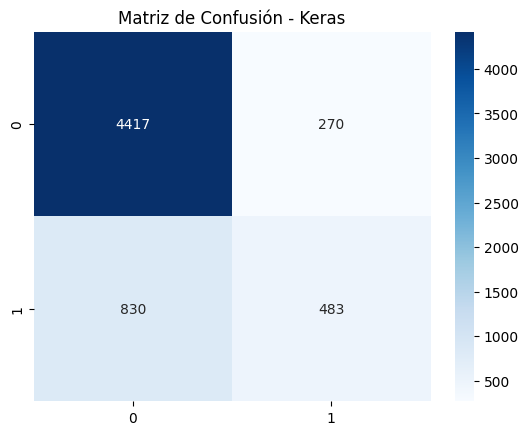

              precision    recall  f1-score   support

           0       0.84      0.94      0.89      4687
           1       0.64      0.37      0.47      1313

    accuracy                           0.82      6000
   macro avg       0.74      0.66      0.68      6000
weighted avg       0.80      0.82      0.80      6000



In [63]:
# Predicciones
y_pred_keras = (model.predict(X_test) > 0.5).astype(int)

# Matriz de Confusión
cm = confusion_matrix(y_test, y_pred_keras)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Matriz de Confusión - Keras")
plt.show()

# Reporte de Clasificación
print(classification_report(y_test, y_pred_keras))


# **10. Implementación con MLPClassifier**

* Vamos a implementar el mismo modelo con el MLPClassifier de Scikit-learn

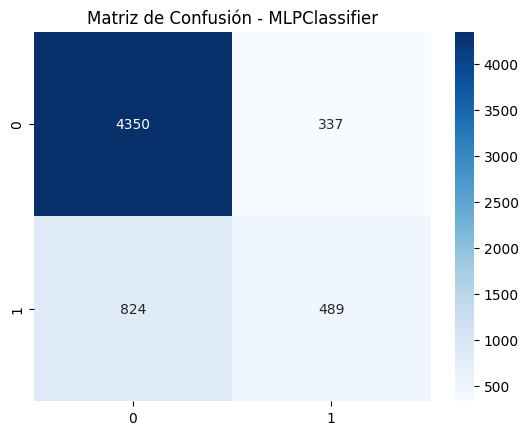

              precision    recall  f1-score   support

           0       0.84      0.93      0.88      4687
           1       0.59      0.37      0.46      1313

    accuracy                           0.81      6000
   macro avg       0.72      0.65      0.67      6000
weighted avg       0.79      0.81      0.79      6000



In [64]:
# Definir el modelo
mlp = MLPClassifier(hidden_layer_sizes=(32, 16, 8), max_iter=300, activation='relu', solver='adam', random_state=42)

# Entrenar el modelo
mlp.fit(X_train, y_train)

# Predicciones
y_pred_mlp = mlp.predict(X_test)

# Matriz de Confusión
cm_mlp = confusion_matrix(y_test, y_pred_mlp)
sns.heatmap(cm_mlp, annot=True, fmt='d', cmap='Blues')
plt.title("Matriz de Confusión - MLPClassifier")
plt.show()

# Reporte de Clasificación
print(classification_report(y_test, y_pred_mlp))


# **11. Guardar Modelos Entrenados**

In [101]:
# Guardar Modelo
model.save('credit_default_keras_model.keras')

* **Cargar Modelo Guardado**

In [102]:
# Carga el modelo guardado en la variable 'loaded_model'
loaded_model = keras.models.load_model("credit_default_keras_model.keras")

* **Guardar Modelo MLPClassifier**

In [100]:
# Guardar el modelo de MLPClassifier
joblib.dump(mlp, 'credit_default_mlp_model.pkl')

['credit_default_mlp_model.pkl']

# **12. Conclusiones**

* Dentro de los modelos de Machine Learning encontramos buenos resultados en el accuracy, el mas bajo es el MLP Classifier, pero al aplicar este modelo con neuronas vemos que mejora bastante.
* En este proyecto vimos que es más esfectivo la aplicación de redes neuronales para generar la predicción.
* Para mejoras futuras, se pueden agregar capas de regularización como Dropout para evitar el sobreajuste.

# **13. Fuentes y Bibliografías**

* Use la información de talento-tech, del mentor **Didier Guerrero** y Ejecutor Tércnico **Andres Escallon**
* Use inteligencia artificial Prompt Gemini y chatGPT
* Recursos de Kaggle dataset y notebook sobre predicción de componentes financieros
